In [59]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
data = pd.read_csv("pollution_us_2000_2016.csv/pollution_california_2000_2016.csv")

import os
os.environ['PROJ_LIB'] = 'C:/Users/viole/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import shapefile
%matplotlib nbagg

In [60]:
data.head()

,id,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Mean,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,3516,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,1/1/2000,14.782609,...,13,25,0.636364,2.0,9,3.0,0.556522,1.3,4,NaN
1,3517,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,1/1/2000,14.782609,...,13,25,0.636364,2.0,9,3.0,0.572222,0.8,6,9.0
2,3518,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,1/1/2000,14.782609,...,13,25,0.600000,2.0,11,NaN,0.556522,1.3,4,NaN
3,3519,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,1/1/2000,14.782609,...,13,25,0.600000,2.0,11,NaN,0.572222,0.8,6,9.0
4,3520,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,Concord,1/2/2000,16.043478,...,9,27,1.000000,2.0,5,3.0,0.578261,1.1,21,NaN


In [61]:
## Prepare all 4 AQIs against state and date 
data = data.dropna(axis='rows')  # Delete rows with NAs
data['Date Local'] = pd.to_datetime(data['Date Local'],format='%m/%d/%Y')  # Change date from string to date value
data = data.groupby(['County','Date Local'], as_index=False).mean()  # Take mean values if there are depulicated entries
data.head()

,County,Date Local,id,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Alameda,2001-12-05,3631.0,6.0,1.0,10.0,32.608696,38.0,15.0,36.0,...,22.0,6.0,1.333333,3.0,11.0,4.0,1.066667,1.2,18.0,14.0
1,Alameda,2001-12-06,3635.0,6.0,1.0,10.0,30.625000,62.0,23.0,60.0,...,0.0,6.0,2.416667,8.0,16.0,11.0,0.266667,0.8,0.0,9.0
2,Alameda,2001-12-07,3639.0,6.0,1.0,10.0,20.416667,32.0,22.0,30.0,...,11.0,18.0,1.625000,5.0,10.0,7.0,0.575000,1.2,8.0,14.0
3,Alameda,2001-12-08,3643.0,6.0,1.0,10.0,27.125000,33.0,16.0,31.0,...,23.0,29.0,1.916667,4.0,4.0,6.0,1.145833,1.9,10.0,22.0
4,Alameda,2001-12-09,3647.0,6.0,1.0,10.0,16.625000,36.0,17.0,34.0,...,0.0,28.0,2.041667,4.0,7.0,6.0,0.479167,1.8,22.0,20.0


In [62]:
data2 = data[['County', 'Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
data2 = data2.groupby([data2['Date Local'].dt.year, data2['Date Local'].dt.month, 'County']).mean()
data2.index = [data2.index.map('{0[0]}/{0[1]}'.format), data2.index.get_level_values(2)]
#data2.reset_index(['County'], inplace = True) 
data2.head(20)

NO2 AQI     O3 AQI    SO2 AQI     CO AQI
       County                                                    
2000/1 Contra Costa    26.556452  15.451613   5.508065  12.532258
       Imperial        61.806452  32.322581  11.129032  43.548387
       Los Angeles     63.354839  13.419355   8.548387  34.053763
       Orange          55.032258  16.774194   7.935484  31.903226
       Riverside       40.322581  16.258065   6.709677  21.516129
       Sacramento      28.344828  14.793103   4.758621  14.724138
       San Bernardino  33.846154  23.846154   4.384615   8.538462
       San Diego       46.688172  19.666667   9.806452  26.526882
       San Francisco   36.032258  13.645161   6.483871  15.838710
       Santa Barbara   15.497312  25.932796   1.798387   5.166667
       Santa Cruz      10.064516  23.161290   2.709677   4.677419
       Solano          29.193548  12.516129   5.354839  21.451613
       Ventura         28.064516  17.741935   3.354839   6.580645
2000/2 Contra Costa    26.201149  22.882184   4.629310   9.856322
       Imperial        47.517241  35.103448   0.172414  30.793103
       Los Angeles     46.873563  22.574713   5.275862  20.379310
       Orange          40.793103  26.413793   7.103448  13.931034
       Riverside       32.000000  23.413793   1.034483  14.379310
       Sacramento      28.074074  24.629630   5.148148  11.592593
       San Bernardino  34.827586  29.379310   3.551724   6.448276

In [63]:
plt.figure(figsize=(10,8))
map = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)
map.drawstates()
map.drawcounties(color = 'black')

# Collect the county names from the shapefile attributes
county_names = []
for shape_dict in map.counties_info:
    county_names.append(shape_dict['NAME'])
    
ax = plt.gca()
cmap, norm = mpl.colors.from_levels_and_colors([0,50,100,150,200,300,500], ['green','yellow','orange','red','purple','maroon'])
m = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

# for i in data2.index:
#     for county in county_names:
#         if(i == (county, 2001, 12)):
# #             print(i)
# #             print(data2.loc[[i],['NO2 AQI']].values)
#             color = m.to_rgba(float(data2.loc[[i],['NO2 AQI']].values))
#             seg = map.counties[county_names.index(county)]
#             poly = Polygon(seg, facecolor=color,edgecolor='black')
#             plt.title(i[1::])
#             ax.add_patch(poly)

# fig = plt.show()
for county in county_names:
    color = m.to_rgba(float(data2.iloc[i, 1]))
    seg = map.counties[county_names.index(county)]
    poly = Polygon(seg, facecolor=color,edgecolor='black')
    plt.title(i[1::])
    ax.add_patch(poly)

fig = plt.show()

def update(i):
    #print(i)
    #plt.title(data2.index[i].strftime('%Y-%m'))
    #plt.title(i[1::])
    for county in county_names:
        #if(i == (county, 2001, 12)):
#             print(i)
#             print(data2.loc[[i],['NO2 AQI']].values)
        color = m.to_rgba(float(data2.iloc[i,0]))
        seg = map.counties[county_names.index(county)]
        poly = Polygon(seg, facecolor=color,edgecolor='black')            
        #plt.title(i[1::])
        ax.add_patch(poly)
    
    plt.show()

anim = FuncAnimation(plt.gcf(),update)
anim

<IPython.core.display.Javascript object>

NameError: name 'i' is not defined

In [64]:
def extractCountyData(county):
    countyData = pd.DataFrame()
    countyData = data[(data.County == county)].copy()
    countyData = countyData[['Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']].groupby(['Date Local'])
    countyData = countyData.mean()
    countyData = countyData.resample('M').max() # Maximum value of the month for each pollutant. Can also be replaced with meanor mode
    #countyData.reset_index(inplace=True)
    return countyData

dataLosAngeles = extractCountyData('Los Angeles')
dataSanFrancisco = extractCountyData('San Francisco')
dataSacramento = extractCountyData('Sacramento')
dataSanBernardino = extractCountyData('San Bernardino')
dataCosta = extractCountyData('Contra Costa')
dataSantaBarbara = extractCountyData('Santa Barbara')
dataSolano = extractCountyData('Solano')
dataImperial = extractCountyData('Imperial')
dataSanDiego = extractCountyData('San Diego')
dataOrange = extractCountyData('Orange')
dataRiverside = extractCountyData('Riverside')
dataAlameda = extractCountyData('Alameda')
dataSantaCruz = extractCountyData('Santa Cruz')
dataFresno = extractCountyData('Fresno')
dataHumboldt = extractCountyData('Humboldt')
dataSantaClara = extractCountyData('Santa Clara')
dataVentura = extractCountyData('Ventura')
dataKern = extractCountyData('Kern')

dataLosAngeles.head()

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
Date Local,,,,
2000-01-31,104.333333,32.000000,32.666667,60.333333
2000-02-29,82.333333,31.666667,14.333333,43.333333
2000-03-31,93.000000,62.000000,15.500000,31.250000
2000-04-30,83.000000,82.000000,14.750000,23.250000
2000-05-31,73.000000,133.000000,47.750000,19.750000


<IPython.core.display.Javascript object>


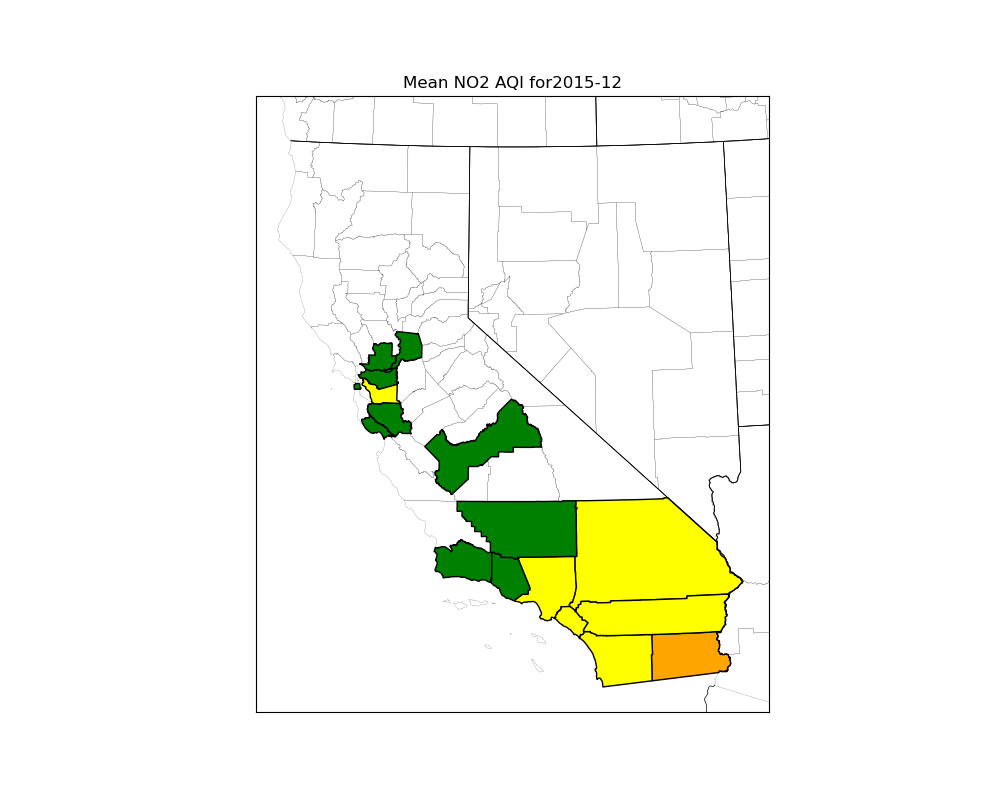

In [142]:
pol = 0 # NO2 AQI

mpl.rcParams['figure.figsize'] = (10,8)
fig = plt.figure()
map = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)
map.drawstates()
map.drawcounties(color = 'black')

# Collect the county names from the shapefile attributes
county_names = []
for shape_dict in map.counties_info:
        county_names.append(shape_dict['NAME'])
    
ax = plt.gca()

# Initialize 

cmap, norm = mpl.colors.from_levels_and_colors([0,50,100,150,200,300,500], ['green','yellow','orange','red','purple','maroon'])
m = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
plt.title('Maximum NO2 AQI in ' + dataLosAngeles.index[0].strftime('%Y-%m'))


def scatterCounty(county, countyData):
    # Initialize 
    color = m.to_rgba(countyData.iloc[0,pol])
    #print(countyData.iloc[0,0])
    #print(color)
    indices = [i for i, x in enumerate(county_names) if x == county]
    #for index in indices:
    seg = map.counties[max(indices)]
    if (county == 'Orange'):
        seg = map.counties[min(indices)]
    poly = Polygon(seg, facecolor=color,edgecolor='black')
    ax.add_patch(poly)
    return poly

p1 = scatterCounty('Los Angeles', dataLosAngeles)
p2 = scatterCounty('San Francisco', dataSanFrancisco)
p3 = scatterCounty('Sacramento', dataSacramento)
p4 = scatterCounty('San Bernardino', dataSanBernardino)
p5 = scatterCounty('Contra Costa', dataCosta)
p6 = scatterCounty('Santa Barbara', dataSantaBarbara)
p7 = scatterCounty('Solano', dataSolano)
p8 = scatterCounty('Imperial', dataImperial)
p9 = scatterCounty('San Diego', dataSanDiego)
p10 = scatterCounty('Orange', dataOrange)
p11 = scatterCounty('Riverside', dataRiverside)
p12 = scatterCounty('Alameda', dataAlameda)
p13 = scatterCounty('Santa Cruz', dataSantaCruz)
p14 = scatterCounty('Fresno', dataFresno)
#p15 = scatterCounty('Humboldt', dataHumboldt)
p16 = scatterCounty('Santa Clara', dataSantaClara)
p17 = scatterCounty('Ventura', dataVentura)
p18 = scatterCounty('Kern', dataKern)

# Update function for animation
def update(i):
    #print(i)
    plt.title('Maximum NO2 AQI in ' + dataLosAngeles.index[i].strftime('%Y-%m'))
    
    p1.set_color(m.to_rgba(dataLosAngeles.iloc[i,pol]))
    p1.set_edgecolor('black')
    
    p2.set_color(m.to_rgba(dataSanFrancisco.iloc[i,pol]))
    p2.set_edgecolor('black')
    
    p3.set_color(m.to_rgba(dataSacramento.iloc[i,pol]))
    p3.set_edgecolor('black')
    
    p4.set_color(m.to_rgba(dataSanBernardino.iloc[i,pol]))
    p4.set_edgecolor('black')
    
    p5.set_color(m.to_rgba(dataCosta.iloc[i,pol])) 
    p5.set_edgecolor('black')
    
    p6.set_color(m.to_rgba(dataSantaBarbara.iloc[i,pol]))
    p6.set_edgecolor('black')
    
    p7.set_color(m.to_rgba(dataSolano.iloc[i,pol]))
    p7.set_edgecolor('black')
    
    p8.set_color(m.to_rgba(dataImperial.iloc[i,pol]))
    p8.set_edgecolor('black')
    
    p9.set_color(m.to_rgba(dataSanDiego.iloc[i,pol]))
    p9.set_edgecolor('black')
    
    p10.set_color(m.to_rgba(dataOrange.iloc[i,pol]))
    p10.set_edgecolor('black')
    
    p11.set_color(m.to_rgba(dataRiverside.iloc[i,pol]))
    p11.set_edgecolor('black')
    
    p12.set_color(m.to_rgba(dataAlameda.iloc[i,pol]))
    p12.set_edgecolor('black')
    
    p13.set_color(m.to_rgba(dataSantaCruz.iloc[i,pol]))
    p13.set_edgecolor('black')
    
    p14.set_color(m.to_rgba(dataFresno.iloc[i,pol]))
    p14.set_edgecolor('black')
    
#     p15.set_color(m.to_rgba(dataHumboldt.iloc[i,pol]))
#     p15.set_edgecolor('black')
    
    p16.set_color(m.to_rgba(dataSantaClara.iloc[i,pol]))
    p16.set_edgecolor('black')
    
    p17.set_color(m.to_rgba(dataVentura.iloc[i,pol]))
    p17.set_edgecolor('black')
    
    p18.set_color(m.to_rgba(dataKern.iloc[i,pol]))
    p18.set_edgecolor('black') 

anim = FuncAnimation(plt.gcf(),update)
anim